# Tottenham’s Performance under Pochettino

In [3]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os 

# load darasets

df_2425 = pd.read_csv('Datasets/Spurs_Matchlog_202425.csv')
df_2324 = pd.read_csv('Datasets/Spurs_Matchlog_202324.csv')
df_2223 = pd.read_csv('Datasets/Spurs_Matchlog_202223.csv')
df_2122 = pd.read_csv('Datasets/Spurs_Matchlog_202122.csv')
df_2021 = pd.read_csv('Datasets/Spurs_Matchlog_202021.csv')
df_1920 = pd.read_csv('Datasets/Spurs_Matchlog_201920.csv')
df_1819 = pd.read_csv('Datasets/Spurs_Matchlog_201819.csv')
df_1718 = pd.read_csv('Datasets/Spurs_Matchlog_201718.csv')
df_1617 = pd.read_csv('Datasets/Spurs_Matchlog_201718.csv')
df_1516 = pd.read_csv('Datasets/Spurs_Matchlog_201718.csv')

## Key Performance Statistics

> We will first compare key performance metrics to see how Tottenham has performed under Poch compared to other managers, from the 15/16 season to the on-going 24/25 season

1. Points per game
2. Goal difference
3. possession stats
4. Goals Scored per game
5. Goals Conceded per game
6. Win Percentage (%)



## Data Preparation 

In [27]:
## Combine datasets and assign each game to season and manager 

# manager tenure periods
manager_periods = [
    ("Mauricio Pochettino", "05/27/2014", "11/19/2019"),
    ("José Mourinho", "11/20/2019", "04/19/2021"),
    ("Ryan Mason (First Term)", "04/20/2021", "06/29/2021"),
    ("Nuno Espírito Santo", "06/30/2021", "11/01/2021"),
    ("Antonio Conte", "11/02/2021", "03/26/2023"),
    ("Cristian Stellini", "03/27/2023", "04/24/2023"),
    ("Ryan Mason (Second Term)", "04/25/2023", "06/06/2023"),
    ("Ange Postecoglou", "06/07/2023", "03/16/2025")
]
# Define datasets with corresponding seasons
dfs = [
    (df_2425, "2024/25"),
    (df_2324, "2023/24"),
    (df_2223, "2022/23"),
    (df_2122, "2021/22"),
    (df_2021, "2020/21"),
    (df_1920, "2019/20"),
    (df_1819, "2018/19"),
    (df_1718, "2017/18"),
    (df_1617, "2016/17"),
    (df_1516, "2015/16")
]

# Combine datasets and add season column
for df, season in dfs:
    df["Season"] = season  
    df["Date"] = pd.to_datetime(df["Date"])

# merge all dfs into a single DataFrame
df_allseasons = pd.concat([df for df, _ in dfs], ignore_index=True)

# assign manager based on match date
def assign_manager(match_date):
    for manager, start, end in manager_periods:
        if pd.to_datetime(start) <= match_date <= pd.to_datetime(end):
            return manager
df_allseasons["Manager"] = df_allseasons["Date"].apply(assign_manager)


## add points earned column
df_allseasons["Points Earned"] = df_allseasons["Result"].apply(lambda x: 3 if "W" in x else 1 if "D" in x else 0)

# split the 'Result' column into 'Match Outcome' and 'Scoreline'
df_allseasons[["Match Outcome", "Scoreline"]] = df_allseasons["Result"].str.split(" ", n=1, expand=True)

## Drop other unimportant columns
df_allseasons.drop(columns=['Unnamed: 3','Match Report'], axis=1, inplace=True)
df_allseasons.head()


,Rk,Team,Date,Opp,Comp,Result,GF,GA,GD,Poss,G-PK,PK,PKatt,PKm,Season,Manager,Points Earned,Match Outcome,Scoreline
0,1,Tottenham,2025-03-16,Fulham,eng Premier League,L 0-2,0,2,-2,43.0,0.0,0.0,0.0,0.0,2024/25,Ange Postecoglou,0,L,0-2
1,2,Tottenham,2025-03-13,AZ Alkmaar,Europa League,W 3-1,3,1,2,59.0,3.0,0.0,0.0,0.0,2024/25,Ange Postecoglou,3,W,3-1
2,3,Tottenham,2025-03-09,Bournemouth,eng Premier League,D 2-2,2,2,0,61.0,1.0,1.0,1.0,0.0,2024/25,Ange Postecoglou,1,D,2-2
3,4,Tottenham,2025-03-06,AZ Alkmaar,Europa League,L 0-1,0,1,-1,61.0,0.0,0.0,0.0,0.0,2024/25,Ange Postecoglou,0,L,0-1
4,5,Tottenham,2025-02-26,Manchester City,eng Premier League,L 0-1,0,1,-1,55.0,0.0,0.0,0.0,0.0,2024/25,Ange Postecoglou,0,L,0-1


## Tabulating Number of Games for Each Manager

In [28]:
# games per manager
df_allseasons["Manager"].value_counts()

Manager
Mauricio Pochettino         240
Ange Postecoglou             87
José Mourinho                85
Antonio Conte                77
Nuno Espírito Santo          17
Ryan Mason (First Term)       7
Ryan Mason (Second Term)      6
Cristian Stellini             4
Name: count, dtype: int64

## Calculating and Ranking Key Statistics for Each Manager Compared to Pochettino

We will exclude interim managers due to their short tenures and lack of enough games for accurate analysis and visualisation. 

> Hence, we will only be analysing the key statistics for the following managers: 

- Mauricio Pochettino (240 Games - for seasons included)
- José Mourinho (85 games) 
- Antonio Conte (77 games)
- Ange Postecoglou (87 Games - as of 19/3/25)

> We will exclude the following managers: 

- Ryan Mason - first & second term (Combined 13 games)  
- Cristian Stellini (4 games) 
- Nuno Espírito Santo (17 games) 


In [29]:
managers = ["Mauricio Pochettino", "José Mourinho", "Antonio Conte", "Ange Postecoglou"]
stats = []

for manager in managers:
    df_manager = df_allseasons[df_allseasons["Manager"] == manager].copy()
    points_per_game = df_manager["Points Earned"].mean()
    avg_goal_difference = (df_manager["GF"] - df_manager["GA"]).mean()
    avg_possession = df_manager["Poss"].mean()
    goals_per_game = df_manager["GF"].mean()
    goals_con_game = df_manager["GA"].mean()
    win_percentage = (df_manager["Points Earned"].apply(lambda x: 1 if x == 3 else 0).sum() / len(df_manager)) * 100
    stats.append([manager, points_per_game, avg_goal_difference, avg_possession, goals_per_game,goals_con_game, win_percentage])

# create DataFrame with calculated stats
df_stats = pd.DataFrame(stats, columns=["Manager", "Points Per Game", "Goal Difference", "Average Possession", "Goals Scored Per Game", "Goals Conceded Per Game", "Win Percentage"])
df_stats 

# ranking the managers by each statistic 
df_ranking = df_stats.copy()
df_ranking["Points Per Game Rank"] = df_ranking["Points Per Game"].rank(ascending=False)
df_ranking["Goal Difference Rank"] = df_ranking["Goal Difference"].rank(ascending=False)
df_ranking["Average Possession Rank"] = df_ranking["Average Possession"].rank(ascending=False)
df_ranking["Goals Scored Per Game Rank"] = df_ranking["Goals Scored Per Game"].rank(ascending=False)
#note that more less goals conceded = higher rank
df_ranking["Goals Conceded Per Game Rank"] = df_ranking["Goals Conceded Per Game"].rank(ascending=True)
df_ranking["Win Percentage Rank"] = df_ranking["Win Percentage"].rank(ascending=False)

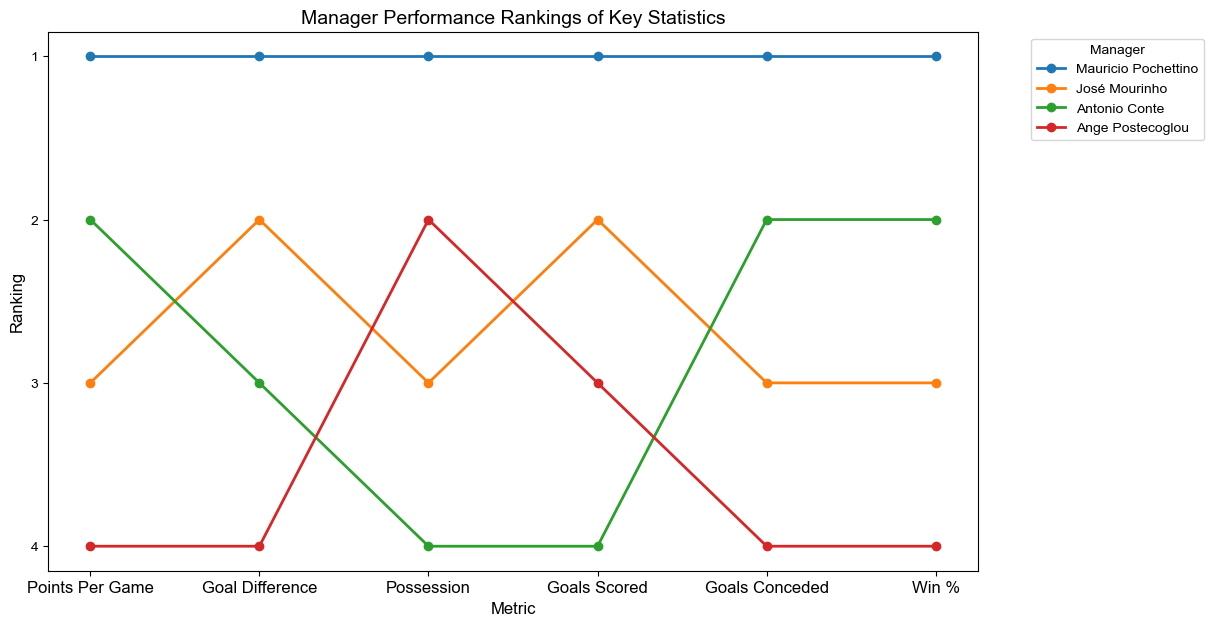

,Manager,Points Per Game,Goal Difference,Average Possession,Goals Scored Per Game,Goals Conceded Per Game,Win Percentage
0,Mauricio Pochettino,1.912500,0.929167,59.970833,1.970833,1.041667,57.083333
1,José Mourinho,1.741176,0.741176,51.690476,1.929412,1.188235,50.588235
2,Antonio Conte,1.753247,0.623377,51.540541,1.766234,1.142857,53.246753
3,Ange Postecoglou,1.597701,0.413793,58.229885,1.885057,1.471264,48.275862


In [30]:
# Transform rankings for bump chart
df_ranking_sorted = df_ranking.melt(id_vars=["Manager"], 
                                    value_vars=["Points Per Game Rank", "Goal Difference Rank", "Average Possession Rank", 
                                                "Goals Scored Per Game Rank", "Goals Conceded Per Game Rank", "Win Percentage Rank"],
                                    var_name="Metric", value_name="Rank")


# Define metric labels for cleaner visualization
metric_labels = {
    "Points Per Game Rank": "Points Per Game",
    "Goal Difference Rank": "Goal Difference",
    "Average Possession Rank": "Possession",
    "Goals Scored Per Game Rank": "Goals Scored",
    "Goals Conceded Per Game Rank": "Goals Conceded",
    "Win Percentage Rank": "Win %"}


# Apply the replacements for all data at once
df_ranking_sorted["Metric"] = df_ranking_sorted["Metric"].replace(metric_labels)


# Create the figure for the bump chart
fig, ax = plt.subplots(figsize=(12, 7))


# Define x-axis order for metrics
metrics = list(metric_labels.values())


# Iterate over each manager and plot rankings
for manager in df_ranking["Manager"].unique():
    manager_data = df_ranking_sorted[df_ranking_sorted["Manager"] == manager]
    ax.plot(manager_data["Metric"], manager_data["Rank"], marker='o', label=manager, linewidth=2)
    
    
# chart adjustments 
plt.rcParams['font.family'] = 'Arial' 
ax.invert_yaxis()  
ax.set_xticks(range(len(metrics)))
ax.set_xticklabels(metrics, fontsize=12)
ax.set_yticks(range(1, int(df_ranking_sorted["Rank"].max()) + 1))
ax.set_xlabel("Metric", fontsize=12)
ax.set_ylabel("Ranking", fontsize=12)
ax.set_title("Manager Performance Rankings of Key Statistics", fontsize=14)
ax.legend(title="Manager", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
df_stats 


## Big Game Statistics 

> How did Pochettino Fare against Premier League big 6 Teams compared to other Spurs Managers? 

In [42]:
# Define Big 6 (excluding Spurs)
big_6 = ["Arsenal", "Chelsea", "Manchester City", "Manchester United", "Liverpool"]

# Filter the full dataset to include only those managers
df_allseasons_filtered = df_allseasons[df_allseasons["Manager"].isin(managers)]

# Store stats
manager_big6_stats = []

for manager_name in managers:
    df_manager = df_allseasons_filtered[df_allseasons_filtered["Manager"] == manager_name]

    # Big 6 matches
    df_big6 = df_manager[df_manager["Opp"].isin(big_6)]
    total_big6 = len(df_big6)
    big6_wins = (df_big6["Match Outcome"] == "W").sum()
    big6_win_pct = (big6_wins / total_big6 * 100) if total_big6 > 0 else 0

    # Arsenal matches (NLD)
    df_arsenal = df_manager[df_manager["Opp"] == "Arsenal"]
    total_arsenal = len(df_arsenal)
    arsenal_wins = (df_arsenal["Match Outcome"] == "W").sum()
    arsenal_win_pct = (arsenal_wins / total_arsenal * 100) if total_arsenal > 0 else 0

    # Store results
    manager_big6_stats.append([
        manager_name,
        total_big6, big6_wins, round(big6_win_pct, 2),
        total_arsenal, arsenal_wins, round(arsenal_win_pct, 2)
    ])

# Create summary DataFrame
df_manager_stats_big6 = pd.DataFrame(manager_big6_stats, columns=[
    "Manager", 
    "Big 6 Matches", "Big 6 Wins", "Big 6 Win %", 
    "Arsenal Matches", "Arsenal Wins", "Arsenal Win %"
])

df_manager_stats_big6

,Manager,Big 6 Matches,Big 6 Wins,Big 6 Win %,Arsenal Matches,Arsenal Wins,Arsenal Win %
0,Mauricio Pochettino,41,13,31.71,10,4,40.00
1,José Mourinho,14,4,28.57,3,2,66.67
2,Antonio Conte,14,4,28.57,3,1,33.33
3,Ange Postecoglou,18,4,22.22,4,0,0.00


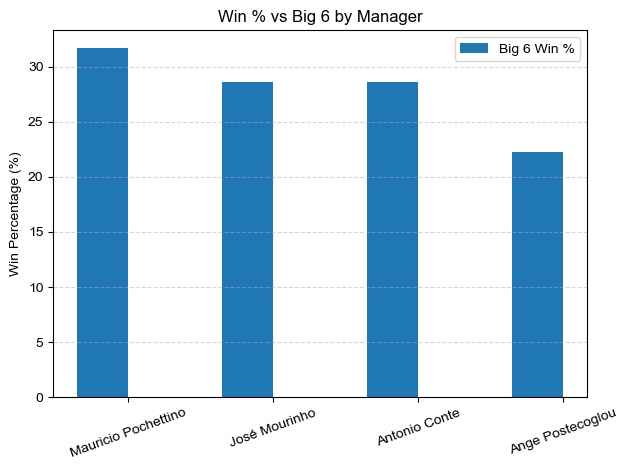

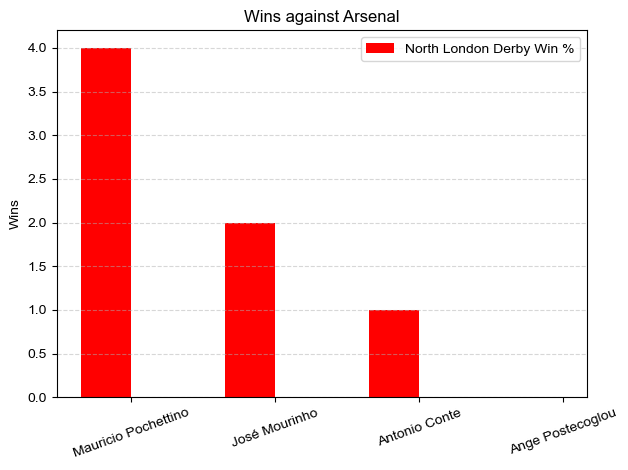

In [50]:
# Plot graph for big 6 win % by manager
managers = df_manager_stats_big6["Manager"]
big6_win_pct = df_manager_stats_big6["Big 6 Win %"]

# Plot bar grpah 
plt.bar(x - bar_width/2, big6_win_pct, width=bar_width, label='Big 6 Win %')
plt.xticks(x, managers, rotation=20)
plt.ylabel("Win Percentage (%)")
plt.title("Win % vs Big 6 by Manager")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Plot graph for NLD win % by manager 
NLD_win_pct = df_manager_stats_big6["Arsenal Wins"]

# Plot bar grpah 
plt.bar(x - bar_width/2, NLD_win_pct, width=bar_width, color='Red', label='North London Derby Win %')
plt.xticks(x, managers, rotation=20)
plt.ylabel("Wins")
plt.title("Wins against Arsenal")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Best Spurs Manager in Recent Years? 



> From the visuals above, it’s clear that Mauricio Pochettino comes out on top across all the key metrics when compared to recent Spurs managers. He even edges out the highly rated José Mourinho, which is impressive considering Mourinho’s reputation, even if his time at Spurs wasn’t regarded as his best. Additionally, Pochettino was the only manager to bring Spurs to their first champion's league final in history. The stats make a pretty solid case for him being Spurs’ best manager in recent years.

>However, there’s a clear reason why he was eventually sacked. Looking at his final season stats, it’s evident he struggled to maintain form, managing just a 29% win rate and averaging only 1.29 points per game.

In [22]:
# Define Pochettino's final stint period in 2019/20
start_date = pd.to_datetime("2019-08-01")
end_date = pd.to_datetime("2019-11-19")

# Filter matches during Pochettino's final season
df_manager = df_allseasons[
    (df_allseasons["Manager"] == "Mauricio Pochettino") & (df_allseasons["Date"] >= start_date) &(df_allseasons["Date"] <= end_date)].copy()

# Calculate metrics
points_per_game = df_manager["Points Earned"].mean()
avg_goal_difference = (df_manager["GF"] - df_manager["GA"]).mean()
avg_possession = df_manager["Poss"].mean()
goals_per_game = df_manager["GF"].mean()
goals_con_game = df_manager["GA"].mean()
win_percentage = (df_manager["Points Earned"].apply(lambda x: 1 if x == 3 else 0).sum() / len(df_manager)) * 100

print ('Pochettino Last Season Statistics:\n')
print (f'Points per Game:  {points_per_game}')
print (f'Goal Difference: {avg_goal_difference}')
print (f'Average Possession: {avg_possession}')
print (f'Goals per Game: {goals_per_game}')
print (f'Goals Conceded per Game: {goals_con_game}')
print (f'Win Percentage (%): {win_percentage}')

Pochettino Last Season Statistics:

Points per Game:  1.2941176470588236
Goal Difference: 0.29411764705882354
Average Possession: 56.8235294117647
Goals per Game: 1.8235294117647058
Goals Conceded per Game: 1.5294117647058822
Win Percentage (%): 29.411764705882355
